# Hosam Wajeeh

Task#1 Prediction using Supervised ML

Predict the percentage of a student based on study hours

This is a simple Linear Regression Task which only takes 2 variables

What will be the predicted score if the student studied for 9.25 hrs/day?!

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Reading the Data
dataset = pd.read_csv('Data.txt')
dataset.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


The dataset consists of 25 records with an average of 5 hours of study time per student and a 51.48% average Score 

Max hours studied are 9.2 while we want to predict on 9.25?!

From what i know it isnt recommended to use linear regression on values that are higher than the max values in the training set?


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


## Using Seaborn Scatter plot to viusalize the relationship between Hours and Scores

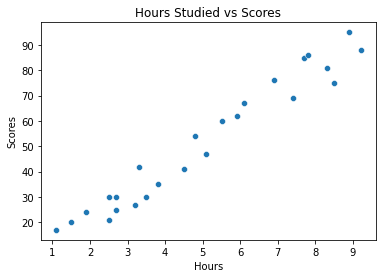

In [5]:
sns.scatterplot(data=dataset, x='Hours', y='Scores')
plt.title('Hours Studied vs Scores')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

In [6]:
#From the scatter plot theres a linear relationship between the hours studied and the scores
dataset.corr() 

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


Splitting the data into Feaures and Labels(Target)

In [7]:
X = dataset['Hours']
y = dataset['Scores']

The Linear Regression object needs the input to be in an array shape of (-1, 1)or(1,-1) also the .reshape doesnt work
on series and the .values changes the X and y from series to an array

In [8]:
X_clean = X.values.reshape(-1, 1)
y_clean = y.values.reshape(-1, 1)

Splitting the data into train/test sets

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_clean, y_clean, test_size=0.2, random_state=0)

Building the mode

In [10]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

### Visualising the Training results

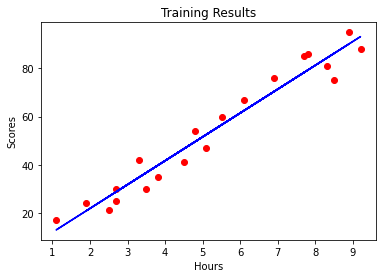

In [11]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, lr.predict(X_train), color = 'blue')
plt.title('Training Results')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

### Visualising the test results


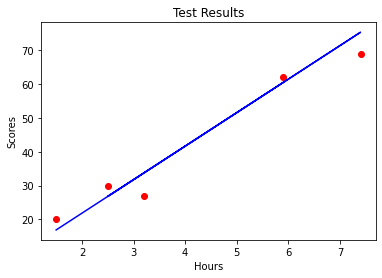

In [12]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_test, lr.predict(X_test), color = 'blue')
plt.title('Test Results')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

### Prediction accuracy on the train data


In [13]:
y_pred_train = lr.predict(X_train)
from sklearn.metrics import r2_score, mean_absolute_error
print('Train R2 Score:',  '{:.2f}%'.format(r2_score(y_train, y_pred_train)*100))
print('Train MAE:',mean_absolute_error(y_train, y_pred_train))

Train R2 Score: 95.16%
Train MAE: 5.186601709180368


### Prediction accuracy on the test data

In [14]:
y_pred = lr.predict(X_test)
from sklearn.metrics import r2_score, mean_absolute_error
print('Test R2 Score:',  '{:.2f}%'.format(r2_score(y_test, y_pred)*100))
print('Test MAE:',mean_absolute_error(y_test, y_pred))

Test R2 Score: 94.55%
Test MAE: 4.183859899002975


### What will be the predicted score if the student studied for 9.25 hrs/day?!


In [15]:
Prediction = lr.predict(np.array([9.25]).reshape(-1,1))
print('If a student studies for 9.25 hrs/day we can expect a score arround', '{:.2f}%'.format(Prediction[0,0]))

If a student studies for 9.25 hrs/day we can expect a score arround 93.69%
